In [1]:
import os
import re
import numpy as np
import pandas as pd
import random
import scipy
import networkx as nx
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cloudpickle as pickle
import copy
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #last_expr

In [14]:
META_PATH = '../Data/Discovery/NASH_forward_63_map.txt'
meta = pd.read_csv(META_PATH, index_col=0, sep='\t')

In [6]:
path = '../function20200220/'

In [17]:
path_anno = pd.read_csv(path+'MetaCYC_annotation.tsv', index_col=0, sep='\t')
path_anno.index = path_anno['ID']
path_anno.head()

,ID,Level,Annotation
ID,,,
Pathways,Pathways,1,L_1__Pathways
Activation-Inactivation-Interconversion,Activation-Inactivation-Interconversion,2,L_1__Pathways;L_2__Activation/Inactivation/Int...
Activation,Activation,3,L_1__Pathways;L_2__Activation/Inactivation/Int...
GLUCOSINOLATE-DEG,GLUCOSINOLATE-DEG,6,L_1__Pathways;L_2__Activation/Inactivation/Int...
PWY-6684,PWY-6684,7,L_1__Pathways;L_2__Activation/Inactivation/Int...


In [5]:
path_data = pd.read_csv(path+'picrust2/path_abun_unstrat.tsv', sep='\t')
path_data

,pathway,NASH50,NASH63,NASH57,NASH60,NASH13,NASH41,NASH54,NASH56,NASH28,...,NASH26,NASH2,NASH43,NASH27,NASH51,NASH32,NASH8,NASH19,NASH69,NASH31
0,1CMET2-PWY,2661.5795,4819.4972,9064.0922,6737.0844,5063.2820,4325.8833,4526.0806,2289.8959,3421.6032,...,2762.3107,3799.4711,1811.6977,5645.8732,3746.6475,3816.6305,2258.0132,5454.4217,2656.7849,5823.3038
1,3-HYDROXYPHENYLACETATE-DEGRADATION-PWY,0.0000,1.7060,0.5603,258.8053,0.0000,10.1348,26.2874,2.4903,4.3876,...,5.2506,96.6384,0.5432,1.1182,17.2543,0.0000,2.4391,0.0000,0.5506,0.0000
2,ALL-CHORISMATE-PWY,0.0000,15.8435,6.6699,901.8568,10.6285,54.0413,127.0392,15.1591,17.6840,...,31.9063,200.3000,4.5630,14.7641,91.6677,0.0000,11.3746,0.0000,5.0784,0.0000
3,ANAEROFRUCAT-PWY,1696.9164,2533.4654,4035.1782,5011.7653,5204.7209,2805.3431,2692.8647,1877.9520,3395.1055,...,2015.4689,1297.5632,1776.7529,5617.8857,3595.4491,3822.6754,2265.6886,4030.2036,2803.1583,5213.1901
4,ANAGLYCOLYSIS-PWY,3126.2920,5890.9206,10268.3917,8660.9051,6201.3006,4869.5940,5045.4878,2806.2486,4368.8284,...,3329.4703,4263.3854,2438.2007,7410.8237,4827.5023,4838.6420,2758.4566,7333.6910,3526.7122,7585.3469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384,TYRFUMCAT-PWY,0.0000,7.2502,4.9850,0.0000,5.4380,0.0000,0.4123,1.4257,0.0000,...,0.0000,0.0000,0.0000,1.2490,1.2476,1.2446,0.0000,1.4224,2.4976,1.2484
385,UBISYN-PWY,2.3737,164.9748,46.7885,470.0865,2.8399,29.7782,57.1559,7.1429,6.2057,...,13.4140,122.8416,5.4170,64.8209,56.4447,78.5347,21.3388,0.7865,28.8751,11.8483
386,UDPNAGSYN-PWY,894.7171,3215.9050,3718.6069,2543.9807,2270.8455,994.7022,1023.3839,1286.8815,2378.7627,...,3334.7971,1117.6376,1287.1920,3268.0238,1497.0749,2179.2933,1052.6750,2643.1757,2041.4510,4717.8117
387,VALDEG-PWY,0.0000,3.9654,15.6629,127.2646,17.4135,19.6135,25.7040,5.6543,0.0000,...,0.0000,14.4250,0.0000,2.3129,25.6240,0.0000,4.1762,0.0000,1.6592,0.0000


In [40]:
from scipy.stats import ranksums
from statsmodels.stats.multitest import multipletests
def cal_RankSum(data, disease, ds1, ds2, anno, alpha = 0.01):
    res = []
    for i in data.columns:
        value1 = data.loc[disease==ds1, i]
        value2 = data.loc[disease==ds2, i]
        score, pvalue = ranksums(value1, value2)
        fold_change = value2.mean()/float(value1.mean()) if value1.mean() else np.nan
        anno_name = anno.loc[i, 'Annotation']
        if list(anno.index).count(i)>1:
            anno_name = ' || '.join(list(anno_name))
        res.append([i, anno_name, value1.mean(), value2.mean(), fold_change, score, pvalue])
    res = pd.DataFrame(res, columns=['ID', 'Annotation', ds1, ds2, 'FC', 'RankSum', 'p-value'])
    reject, fdr, _, _ = multipletests(list(res['p-value']), alpha=alpha, method='fdr_bh')
    res['FDR'] = fdr
    res = res.sort_values(by='FDR', ascending=True)
    res.index = range(len(res.index))
    return res

In [23]:
DiseaseStatus = meta.loc[path_data.columns[1:], 'DiseaseStatus']

In [36]:
data = path_data.copy()
data.index = data['pathway']
data = data.iloc[:, 1:].T

In [41]:
NASH_vs_Normal = cal_RankSum(data, DiseaseStatus, 'Normal', 'NASH', path_anno, alpha = 0.01)
NASH_vs_Normal.to_csv(path+'result/path_ranksum_NASH_vs_Normal.tsv', sep='\t')
Obese_vs_Normal = cal_RankSum(data, DiseaseStatus, 'Normal', 'Obese', path_anno, alpha = 0.01)
Obese_vs_Normal.to_csv(path+'result/path_ranksum_Obese_vs_Normal.tsv', sep='\t')
NASH_vs_Obese = cal_RankSum(data, DiseaseStatus, 'Obese', 'NASH', path_anno, alpha = 0.01)
NASH_vs_Obese.to_csv(path+'result/path_ranksum_NASH_vs_Obese.tsv', sep='\t')

In [53]:
keystones = ['f6944e5be5cca661767014ab95867c4dc3848235', 
             '9075bd7b4542aad1faf685d8960946088cca0810', 
             'c84919371da9c309c2b7a50ab6ed836c0c9555e6']

In [54]:
ko_data = pd.read_csv(path+'picrust2/path_abun_contrib.tsv', sep='\t')

In [56]:
p_loveana = ko_data.loc[ko_data['taxon']==keystones[0], :]
a_indistinctus = ko_data.loc[ko_data['taxon']==keystones[1], :]
d_pneumosintes = ko_data.loc[ko_data['taxon']==keystones[2], :]

annos = []
for i in p_loveana['function']:
    anno_name = path_anno.loc[i, 'Annotation']
    if list(path_anno.index).count(i)>1:
        anno_name = ' || '.join(list(anno_name))
    annos.append(anno_name)
p_loveana['Annotation'] = annos

annos = []
for i in a_indistinctus['function']:
    anno_name = path_anno.loc[i, 'Annotation']
    if list(path_anno.index).count(i)>1:
        anno_name = ' || '.join(list(anno_name))
    annos.append(anno_name)
a_indistinctus['Annotation'] = annos

annos = []
for i in d_pneumosintes['function']:
    anno_name = path_anno.loc[i, 'Annotation']
    if list(path_anno.index).count(i)>1:
        anno_name = ' || '.join(list(anno_name))
    annos.append(anno_name)
d_pneumosintes['Annotation'] = annos

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [57]:
p_loveana.to_csv(path+'result/p_loveana_path.csv')
a_indistinctus.to_csv(path+'result/a_indistinctus_path.csv')
d_pneumosintes.to_csv(path+'result/d_pneumosintes_path.csv')

# 读入KEGG注释信息(KO, Module, Pathway)

In [58]:
ko_data = pd.read_csv('../function/ko.txt', sep='\t', header=None)
all_kos = [i.split(':')[1] for i in list(ko_data[0])]
md_data = pd.read_csv('../function/md.txt', sep='\t', header=None)
all_mds = [i.split(':')[1] for i in list(md_data[0])]

md_data.index = [i.split(':')[1] for i in md_data[0]]

# KEGG Module --> Ko 表格

In [59]:
md2ko_data = pd.read_csv('../function/md2ko.txt', sep='\t', header=None)
md_list = set()
ko_list2 = set()
md2ko = {}
for i in md2ko_data.index:
    md = md2ko_data.loc[i, 1].split('md:')[1].strip()
    ko = md2ko_data.loc[i, 0].split('ko:')[1].strip()
    md_list.add(md)
    ko_list2.add(ko)
    md2ko[md] = md2ko.get(md, set())
    md2ko[md].add(ko)
    #print(md, ko)
print(len(md_list), len(ko_list2))
sorted([len(i) for i in md2ko.values()], reverse=True)[:5]

388 2344


[43, 40, 37, 34, 31]

# 三个关键菌种对应的KO (Picrust)

In [96]:
species = ['0', '1', '2']
s2ko = {'0':set(pd.read_csv(path+'result/p_loveana_ko.csv')['function']), 
        '1':set(pd.read_csv(path+'result/a_indistinctus_ko.csv')['function']), 
        '2':set(pd.read_csv(path+'result/d_pneumosintes_ko.csv')['function'])}

# fisher精确检验函数

In [97]:
# Enrich
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import multipletests

def func_enrich(terms, mapping, species, s2ko):
    ###########################################################################
    #        #        |  KO in Species  | KO Not in species  |  All KOs       #
    # KO in func      |        a        |          b         |   a + b        #
    # KO not in Func  |        c        |          d         |   c + d        #
    #      all        |      a + c      |        b + d       | a + b + c + d  #
    ###########################################################################
    res = []
    for t in terms:
        term_kos = mapping.get(t, set())
        row = [len(term_kos)]
        for s in species:
            species_kos = s2ko[s]
            overlap_kos = term_kos&species_kos
            #if len(overlap_kos)<5:
            #    continue
            a = len(overlap_kos)
            b = len(term_kos) - a
            c = len(species_kos) - a
            d = len(all_kos) - len(term_kos) - c
            oddsratio, pval = fisher_exact([[a, b], [c, d]])
            #print(t, s, oddsratio, pval)
            row.extend([len(overlap_kos), oddsratio, pval])
        res.append(row)
    columns = ['KO_in_term']
    for s in species:
        columns.extend(['KO_in_'+s, s+'_OddsRatio', s+'_pval'])
    res = pd.DataFrame(res, columns=columns, index = terms)
    res = res.sort_values([s+'_pval' for s in species])
    ### fdr
    alpha = 0.01
    columns = ['KO_in_term']
    for s in species:
        reject, fdr, _, _ = multipletests(list(res[s+'_pval']), alpha=alpha, method='fdr_bh')
        res[s+'_fdr'] = fdr
        columns.extend(['KO_in_'+s, s+'_OddsRatio', s+'_pval', s+'_fdr'])
    res = res.loc[:, columns]
    return res

md_enrich = func_enrich(all_mds, md2ko, species, s2ko)

# Module富集

In [98]:
md_enrich = md_enrich.loc[md_enrich[[s+'_fdr' for s in species]].min(1)<0.05, :]
md_enrich.to_csv(path+'result/keystone_ko_enrich_all.csv')

In [92]:
import json
path_class = json.loads(''.join(open('../function/ko00002.json', 'r').readlines()))
pathways = path_class['children'][0]['children']
path_map = []
for l1 in pathways:
    #print(l1['name'], len(l1['children']))
    for l2 in l1['children']:
        mds = [i['name'].split(' ')[0].strip() for i in l2['children']]
        #print('   ', l2['name'], len(l2['children']), len(mds))
        path_map.append([l1['name'], l2['name'], mds])
        #print(l1['name'], l2['name'], len(mds))

md_enrich = md_enrich.loc[md_enrich[[s+'_fdr' for s in species]].min(1)<0.05, :]
md_enrich['MD_Name'] = [md_data.loc[i, 1] for i in md_enrich.index]
columns = ['MD_Name']
columns.extend(md_enrich.columns[:-1])
md_enrich = md_enrich.loc[:, columns]

sort_res = []
index = []
for l1, l2, mds in path_map:
    for md in md_enrich.index:
        if md in mds:
            row = [l1, l2]
            row.extend(list(md_enrich.loc[md, :]))
            sort_res.append(row)
            index.append(md)
columns = ['Path_l1', 'Path_l2']
columns.extend(md_enrich.columns)
sort_res = pd.DataFrame(sort_res, index=index, columns=columns)

sort_res.to_csv(path+'result/keystone_ko_enrich_anno.csv')

In [89]:
for i in s2ko['0']:
    print(i)

K01787
K02968
K00648
K00971
K01867
K02227
K03595
K00287
K08218
K00912
K07301
K14155
K05592
K08281
K00927
K02619
K07405
K07098
K02916
K02895
K07386
K03625
K01056
K00819
K07139
K06158
K03657
K07568
K01129
K03437
K02003
K01955
K03168
K03617
K13993
K01284
K00688
K00793
K02888
K13542
K02226
K02316
K03466
K02355
K03270
K00426
K03629
K03655
K11105
K00826
K04079
K00928
K01776
K06973
K00177
K00215
K00528
K02314
K01945
K00278
K04761
K09748
K02065
K03976
K02548
K02037
K00788
K02188
K01665
K00610
K03696
K08641
K02967
K01035
K01868
K03797
K03496
K00231
K01770
K02914
K01934
K02517
K03555
K00554
K00014
K04096
K06147
K05515
K00347
K03593
K01893
K03644
K06997
K02892
K00266
K03040
K07263
K07025
K03630
K01950
K00790
K00873
K07456
K02377
K12251
K00782
K03289
K03773
K07024
K01493
K01952
K02622
K17828
K03628
K18014
K11754
K01034
K03386
K01658
K06872
K03650
K03217
K00806
K02834
K01735
K03665
K15460
K11753
K01619
K02906
K05606
K03811
K07132
K02887
K00350
K05807
K11991
K01206
K01715
K00075
K01887
K00951
K03070

# Plot

In [105]:
species = ['0', 'pah', 'pcre', 'pgi', 'pgn', 'pgt', '1', 'ash', 'afd', '2', 'dpn']
enrich = pd.read_csv('../function20200220/result/Keystone_picrust_kegg_MD_enrich_all.csv', index_col=0)
sort_res = []
index = []
for l1, l2, mds in path_map:
    for md in enrich.index:
        if md in mds:
            row = [l1, l2]
            row.extend(list(enrich.loc[md, :]))
            sort_res.append(row)
            index.append(md)
columns = ['Path_l1', 'Path_l2']
columns.extend(enrich.columns)
sort_res = pd.DataFrame(sort_res, index=index, columns=columns)
sort_res.to_csv(path+'result/Keystone_picrust_kegg_MD_enrich_all_anno.csv')
sort_res = sort_res.loc[sort_res[[s+'_fdr' for s in species]].min(1)<0.01, :]
sort_res.to_csv(path+'result/Keystone_picrust_kegg_MD_enrich_all_anno_0.01.csv')

In [146]:
species = ['0', 'pah', 'pcre', 'pgi', 'pgn', 'pgt', '1', 'ash', 'afd', '2', 'dpn']
sort_res = pd.read_csv(path+'result/Keystone_picrust_kegg_MD_enrich_all_anno_0.01_cut2.csv', index_col=0)
for s in species:
    sort_res[s+'_-log_fdr'] = [-np.log10(i) for i in sort_res[s+'_fdr']]
    sort_res[s+'_significant'] = [1 if i<=0.01 else 0 for i in sort_res[s+'_fdr']]
columns = ['Path_l1', 'Path_l2', 'MD_Name']
columns.extend([s+'_-log_fdr' for s in species])
sort_res = sort_res.loc[:, columns]
sort_res.head()

,Path_l1,Path_l2,MD_Name,0_-log_fdr,pah_-log_fdr,pcre_-log_fdr,pgi_-log_fdr,pgn_-log_fdr,pgt_-log_fdr,1_-log_fdr,ash_-log_fdr,afd_-log_fdr,2_-log_fdr,dpn_-log_fdr
M00004,Carbohydrate metabolism,Central carbohydrate metabolism,Pentose phosphate pathway (Pentose phosphate c...,1.966226,4.002614,2.998909,2.879317,2.798651,2.791349,2.867487,1.965404,2.624357,3.958438,1.986827
M00009,Carbohydrate metabolism,Central carbohydrate metabolism,"Citrate cycle (TCA cycle, Krebs cycle)",6.508638,6.480172,6.647817,4.539102,4.492144,4.454693,4.632644,4.675718,4.202040,0.592033,-0.000000
M00011,Carbohydrate metabolism,Central carbohydrate metabolism,"Citrate cycle, second carbon oxidation, 2-oxog...",7.142668,7.192465,7.274905,5.049635,5.013228,4.982967,5.192465,5.333482,4.772113,0.791819,-0.000000
M00532,Carbohydrate metabolism,Other carbohydrate metabolism,Photorespiration,3.995099,2.916520,2.998909,2.879317,2.798651,2.791349,3.937196,2.832199,2.624357,0.344072,0.319560
M00632,Carbohydrate metabolism,Other carbohydrate metabolism,"Galactose degradation, Leloir pathway, galacto...",2.812038,0.272714,0.256330,2.767692,2.724195,2.722758,2.774279,1.356343,2.624357,0.233883,0.180637


(45, 11)

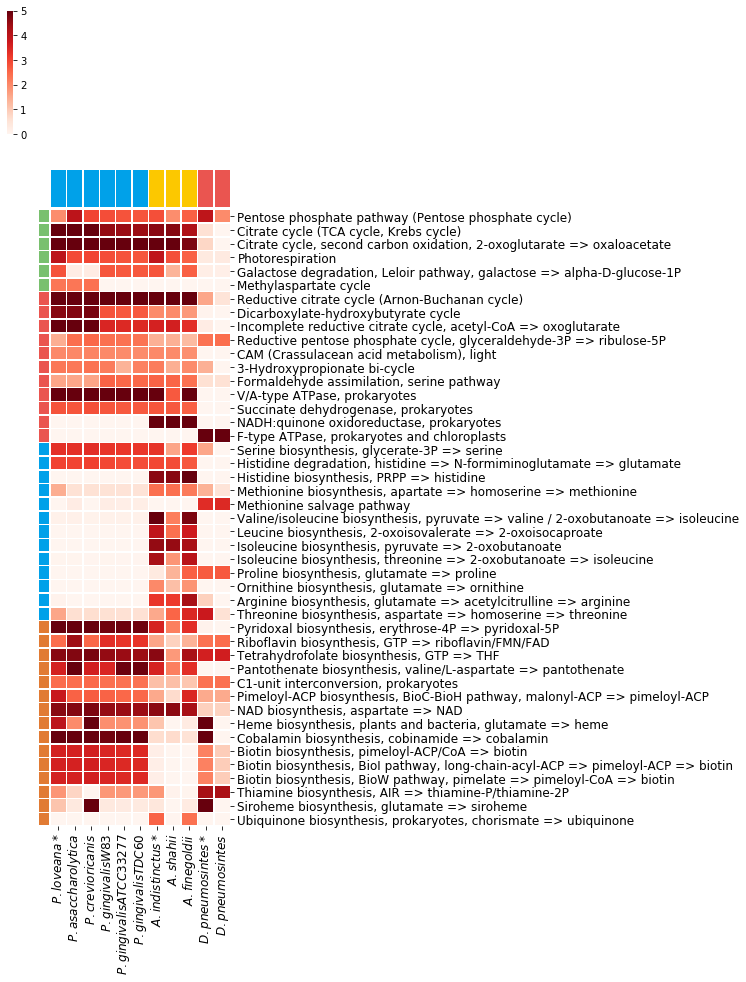

In [147]:
hearmap_data = sort_res[[s+'_-log_fdr' for s in species]]
hearmap_data.shape

col_colors = ['#00a1e9', '#00a1e9', '#00a1e9', '#00a1e9', '#00a1e9', '#00a1e9', 
              '#fcc800', '#fcc800', '#fcc800', '#ea5550', '#ea5550']
colors = {'Carbohydrate metabolism':'#79c06e', 'Energy metabolism':'#ea5550', 'Lipid metabolism':'#fcc800',
         'Nucleotide metabolism':'#ffdc00', 'Amino acid metabolism':'#00a1e9', 'Glycan metabolism':'#00a960',
         'Metabolism of cofactors and vitamins': '#e17b34', 'Biosynthesis of terpenoids and polyketides':'#915da3'}
row_colors = [colors[i] for i in sort_res['Path_l1']]
mask = sort_res[[s+'_-log_fdr' for s in species]]<=-np.log10(0.01)
g = sns.clustermap(hearmap_data, mask=None, cmap="Reds", vmin=0, vmax=5, row_cluster=False, col_cluster=False,
                   col_colors=col_colors, row_colors=row_colors, figsize=(4, 15), linewidths=0.5, )
_ = g.ax_heatmap.axes.set_ylim([45, -0.])
_ = g.ax_heatmap.axes.set_yticklabels(sort_res['MD_Name'], fontsize=12)
_ = g.ax_heatmap.axes.set_xticklabels(['$P. loveana *$', '$P. asaccharolytica$', '$P. crevioricanis$',
                                      '$P. gingivalis W83$', '$P. gingivalis ATCC 33277$',
                                      '$P. gingivalis TDC60$', '$A. indistinctus *$', '$A. shahii$',
                                       '$A. finegoldii$', '$D. pneumosintes *$', '$D. pneumosintes$'], fontsize=12)